In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Ploting Eye Movement Data Gaze Point
Change file path to plot differnet participatns data

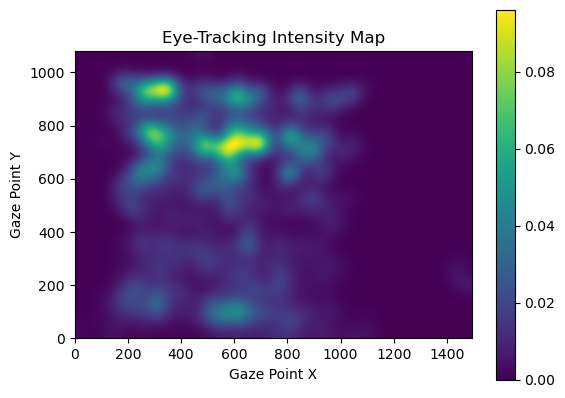

In [260]:
# load data for ploting
# specify the file path
data = pd.read_csv(r"\dataset\EyeT\EyeT_group_dataset_III_image_name_letter_card_participant_15_trial_5.csv", low_memory=False)

# Extract the x and y coordinates
x = data.loc[:, ["Gaze point X", "Gaze point Y"]]

x = x.dropna()
# Sample eye-tracking data (replace with your own data)
temp = x.iloc[:, 0].to_numpy() # X coordinates (assuming screen width of 800 pixels)
y = x.iloc[:, 1].to_numpy() # Y coordinates (assuming screen height of 600 pixels)
x = temp

# Create a 2D histogram to compute the intensity
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(1493, 1080))  # Adjust bins as needed

# Smooth the heatmap (optional)
from scipy.ndimage import gaussian_filter
heatmap = gaussian_filter(heatmap, sigma=30)  # Adjust sigma for smoothing

# Create a figure and axis
fig, ax = plt.subplots()

# Create the heat map using imshow
cax = ax.imshow(heatmap.T, cmap='viridis', extent=[0, 1493, 0, 1080], origin='lower')

# Add a colorbar
cbar = plt.colorbar(cax)

# Set axis labels and title
ax.set_xlabel('Gaze Point X')
ax.set_ylabel('Gaze Point Y')
ax.set_title('Eye-Tracking Intensity Map')

# Show the plot
plt.show()

#### Create two csv file with appropriate headers to store preprocessed data

In [281]:
import csv

# CSV file path
csv_file1 = "preprocessed_data_II.csv"

# Create the CSV file with specific columns
header = [
    'Participant nr',
    'fixation_pupil_left_mean',
    'fixation_pupil_left_std',
    'fixation_pupil_left_max',
    'fixation_pupil_left_min',
    'fixation_pupil_right_mean',
    'fixation_pupil_right_std',
    'fixation_pupil_right_max',
    'fixation_pupil_right_min',
    'saccade_pupil_left_mean',
    'saccade_pupil_left_std',
    'saccade_pupil_left_max',
    'saccade_pupil_left_min',
    'saccade_pupil_right_mean',
    'saccade_pupil_right_std',
    'saccade_pupil_right_max',
    'saccade_pupil_right_min',
    'fixation_mean',
    'saccade_mean',
]
with open(csv_file1, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)
    

# CSV file path
csv_file2 = "preprocessed_data_III.csv"

# Create the CSV file with specific columns
header = [
    'Participant nr',
    'fixation_pupil_left_mean',
    'fixation_pupil_left_std',
    'fixation_pupil_left_max',
    'fixation_pupil_left_min',
    'fixation_pupil_right_mean',
    'fixation_pupil_right_std',
    'fixation_pupil_right_max',
    'fixation_pupil_right_min',
    'saccade_pupil_left_mean',
    'saccade_pupil_left_std',
    'saccade_pupil_left_max',
    'saccade_pupil_left_min',
    'saccade_pupil_right_mean',
    'saccade_pupil_right_std',
    'saccade_pupil_right_max',
    'saccade_pupil_right_min',
    'fixation_mean',
    'saccade_mean',
]
with open(csv_file2, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)

## Merge the trials of each participants

In [ ]:
import pandas as pd
import os

# Directory containing the CSV files
data_directory = r'\dataset\EyeT'  # specify dataset full path

# Create a directory to store the merged files
output_directory = r'\dataset\Merged' # specify the output path for merged dataset

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Dictionary to store trial numbers for each participant and dataset
participant_data = {}

# Loop through all files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        # Extract participant number and dataset serial from the filename
        parts = filename.split('_')
        participant_number = parts[-3]
        dataset_serial = parts[3]

        # Read the CSV file
        df = pd.read_csv(os.path.join(data_directory, filename), low_memory=False)

        # Add the DataFrame to the participant's entry in the dictionary
        key = (participant_number, dataset_serial)
        if key in participant_data:
            participant_data[key].append(df)
        else:
            participant_data[key] = [df]

# Merge DataFrames for each participant and dataset and save as CSV
for (participant_number, dataset_serial), dataframes in participant_data.items():
    merged_df = pd.concat(dataframes, ignore_index=True)
    merged_filename = f"participant_{participant_number}_dataset_{dataset_serial}_merged.csv"
    merged_filepath = os.path.join(output_directory, merged_filename)
    merged_df.to_csv(merged_filepath, index=False)

### Preprocess those marged dataset and save them to two differnet files for control group and test group

In [286]:
# Loop through all files in the directory
for filename in os.listdir(output_directory):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        # Extract participant number and dataset serial from the filename
        parts = filename.split('_')
        dataset_serial = parts[3]
        participant_number = parts[1]
        
        ## this part of code is used to store control group preprocessed data
        
        if dataset_serial == 'II':
            data = pd.read_csv(os.path.join(output_directory, filename), low_memory=False)
            # Create a sub DataFrame with relevant columns
            sub_df = data.loc[:, ['Pupil diameter left', 'Pupil diameter right', 'Presented Stimulus name', 'Eye movement type']]

            # Replace commas with periods in the pupil diameter columns
            sub_df['Pupil diameter left'] = sub_df['Pupil diameter left'].str.replace(',', '.')
            sub_df['Pupil diameter right'] = sub_df['Pupil diameter right'].str.replace(',', '.')

            # Convert the columns to numeric
            sub_df['Pupil diameter left'] = pd.to_numeric(sub_df['Pupil diameter left'])
            sub_df['Pupil diameter right'] = pd.to_numeric(sub_df['Pupil diameter right'])

            # Perform linear interpolation for the columns
            sub_df['Pupil diameter left'].interpolate(method='linear', inplace=True)
            sub_df['Pupil diameter right'].interpolate(method='linear', inplace=True)

            sub_df_cleaned = sub_df.dropna(subset=['Presented Stimulus name'])
            sub_df_cleaned = sub_df_cleaned.dropna(subset=['Pupil diameter left'])
            sub_df_cleaned = sub_df_cleaned.dropna(subset=['Pupil diameter right'])

            sub_df_cleaned = sub_df_cleaned.drop('Presented Stimulus name', axis=1)

            # sub_df_cleaned.head()

            # Calculate fixation and saccade counts
            fixation_count = (sub_df_cleaned['Eye movement type'] == 'Fixation').sum()
            saccade_count = (sub_df_cleaned['Eye movement type'] == 'Saccade').sum()
            total_rows = len(sub_df_cleaned)

            # Calculate mean and standard deviation of pupil diameters for fixations and saccades
            fixation_pupil_left_mean = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter left'].mean()
            fixation_pupil_left_std = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter left'].std()
            fixation_pupil_left_max = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter left'].max()
            fixation_pupil_left_min = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter left'].min()


            fixation_pupil_right_mean = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter right'].mean()
            fixation_pupil_right_std = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter right'].std()
            fixation_pupil_right_max = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter right'].max()
            fixation_pupil_right_min = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter right'].min()

            saccade_pupil_left_mean = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter left'].mean()
            saccade_pupil_left_std = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter left'].std()
            saccade_pupil_left_max = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter left'].max()
            saccade_pupil_left_min = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter left'].min()

            saccade_pupil_right_mean = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter right'].mean()
            saccade_pupil_right_std = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter right'].std()
            saccade_pupil_right_max = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter right'].max()
            saccade_pupil_right_min = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter right'].min()
            

            # Calculate fixation and saccade means
            fixation_mean = fixation_count / total_rows
            saccade_mean = saccade_count / total_rows

            # Data to be appended
            new_data = [
                participant_number,
                fixation_pupil_left_mean,
                fixation_pupil_left_std,
                fixation_pupil_left_max,
                fixation_pupil_left_min,
                fixation_pupil_right_mean,
                fixation_pupil_right_std,
                fixation_pupil_right_max,
                fixation_pupil_right_min,
                saccade_pupil_left_mean,
                saccade_pupil_left_std,
                saccade_pupil_left_max,
                saccade_pupil_left_min,
                saccade_pupil_right_mean,
                saccade_pupil_right_std,
                saccade_pupil_right_max,
                saccade_pupil_right_min,
                fixation_mean,
                saccade_mean,
            ]

            # Open the CSV file in append mode
            with open(csv_file1, mode="a", newline="") as file:
                writer = csv.writer(file)

                # Write the new data as a row in the CSV file
                writer.writerow(new_data)
        
        ## this part of code to store test group preprocessed data
        if dataset_serial == 'III':
            data = pd.read_csv(os.path.join(output_directory, filename), low_memory=False)
            # Create a sub DataFrame with relevant columns
            sub_df = data.loc[:, ['Pupil diameter left', 'Pupil diameter right', 'Presented Stimulus name', 'Eye movement type']]

            # Replace commas with periods in the pupil diameter columns
            sub_df['Pupil diameter left'] = sub_df['Pupil diameter left'].str.replace(',', '.')
            sub_df['Pupil diameter right'] = sub_df['Pupil diameter right'].str.replace(',', '.')

            # Convert the columns to numeric
            sub_df['Pupil diameter left'] = pd.to_numeric(sub_df['Pupil diameter left'])
            sub_df['Pupil diameter right'] = pd.to_numeric(sub_df['Pupil diameter right'])

            # Perform linear interpolation for the columns
            sub_df['Pupil diameter left'].interpolate(method='linear', inplace=True)
            sub_df['Pupil diameter right'].interpolate(method='linear', inplace=True)

            sub_df_cleaned = sub_df.dropna(subset=['Presented Stimulus name'])
            sub_df_cleaned = sub_df_cleaned.dropna(subset=['Pupil diameter left'])
            sub_df_cleaned = sub_df_cleaned.dropna(subset=['Pupil diameter right'])

            sub_df_cleaned = sub_df_cleaned.drop('Presented Stimulus name', axis=1)

            # sub_df_cleaned.head()

            # Calculate fixation and saccade counts
            fixation_count = (sub_df_cleaned['Eye movement type'] == 'Fixation').sum()
            saccade_count = (sub_df_cleaned['Eye movement type'] == 'Saccade').sum()
            total_rows = len(sub_df_cleaned)

            # Calculate mean and standard deviation of pupil diameters for fixations and saccades
            fixation_pupil_left_mean = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter left'].mean()
            fixation_pupil_left_std = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter left'].std()
            fixation_pupil_left_max = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter left'].max()
            fixation_pupil_left_min = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter left'].min()


            fixation_pupil_right_mean = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter right'].mean()
            fixation_pupil_right_std = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter right'].std()
            fixation_pupil_right_max = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter right'].max()
            fixation_pupil_right_min = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Fixation']['Pupil diameter right'].min()

            saccade_pupil_left_mean = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter left'].mean()
            saccade_pupil_left_std = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter left'].std()
            saccade_pupil_left_max = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter left'].max()
            saccade_pupil_left_min = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter left'].min()

            saccade_pupil_right_mean = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter right'].mean()
            saccade_pupil_right_std = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter right'].std()
            saccade_pupil_right_max = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter right'].max()
            saccade_pupil_right_min = sub_df_cleaned[sub_df_cleaned['Eye movement type'] == 'Saccade']['Pupil diameter right'].min()
            

            # Calculate fixation and saccade means
            fixation_mean = fixation_count / total_rows
            saccade_mean = saccade_count / total_rows

            # Data to be appended
            new_data = [
                participant_number,
                fixation_pupil_left_mean,
                fixation_pupil_left_std,
                fixation_pupil_left_max,
                fixation_pupil_left_min,
                fixation_pupil_right_mean,
                fixation_pupil_right_std,
                fixation_pupil_right_max,
                fixation_pupil_right_min,
                saccade_pupil_left_mean,
                saccade_pupil_left_std,
                saccade_pupil_left_max,
                saccade_pupil_left_min,
                saccade_pupil_right_mean,
                saccade_pupil_right_std,
                saccade_pupil_right_max,
                saccade_pupil_right_min,
                fixation_mean,
                saccade_mean,
            ]

            # Open the CSV file in append mode
            with open(csv_file2, mode="a", newline="") as file:
                writer = csv.writer(file)

                # Write the new data as a row in the CSV file
                writer.writerow(new_data)

### Cross validation

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# # Load your dataset into a pandas DataFrame (replace this with your dataset)
# data = pd.read_csv('your_dataset.csv')

# # Separate features (X) and target variable (y)
# X = data.drop('target_column', axis=1)  # Replace 'target_column' with your target variable's name
# y = data['target_column']

# Create a Linear Regression model
model = LinearRegression()

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared error scores to positive values
mse_scores = -cv_scores

# Calculate mean and standard deviation of MSE scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Print the results
print(f'Mean MSE: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')

Mean MSE: 1138.311310307354
Standard Deviation of MSE: 1004.621002606465


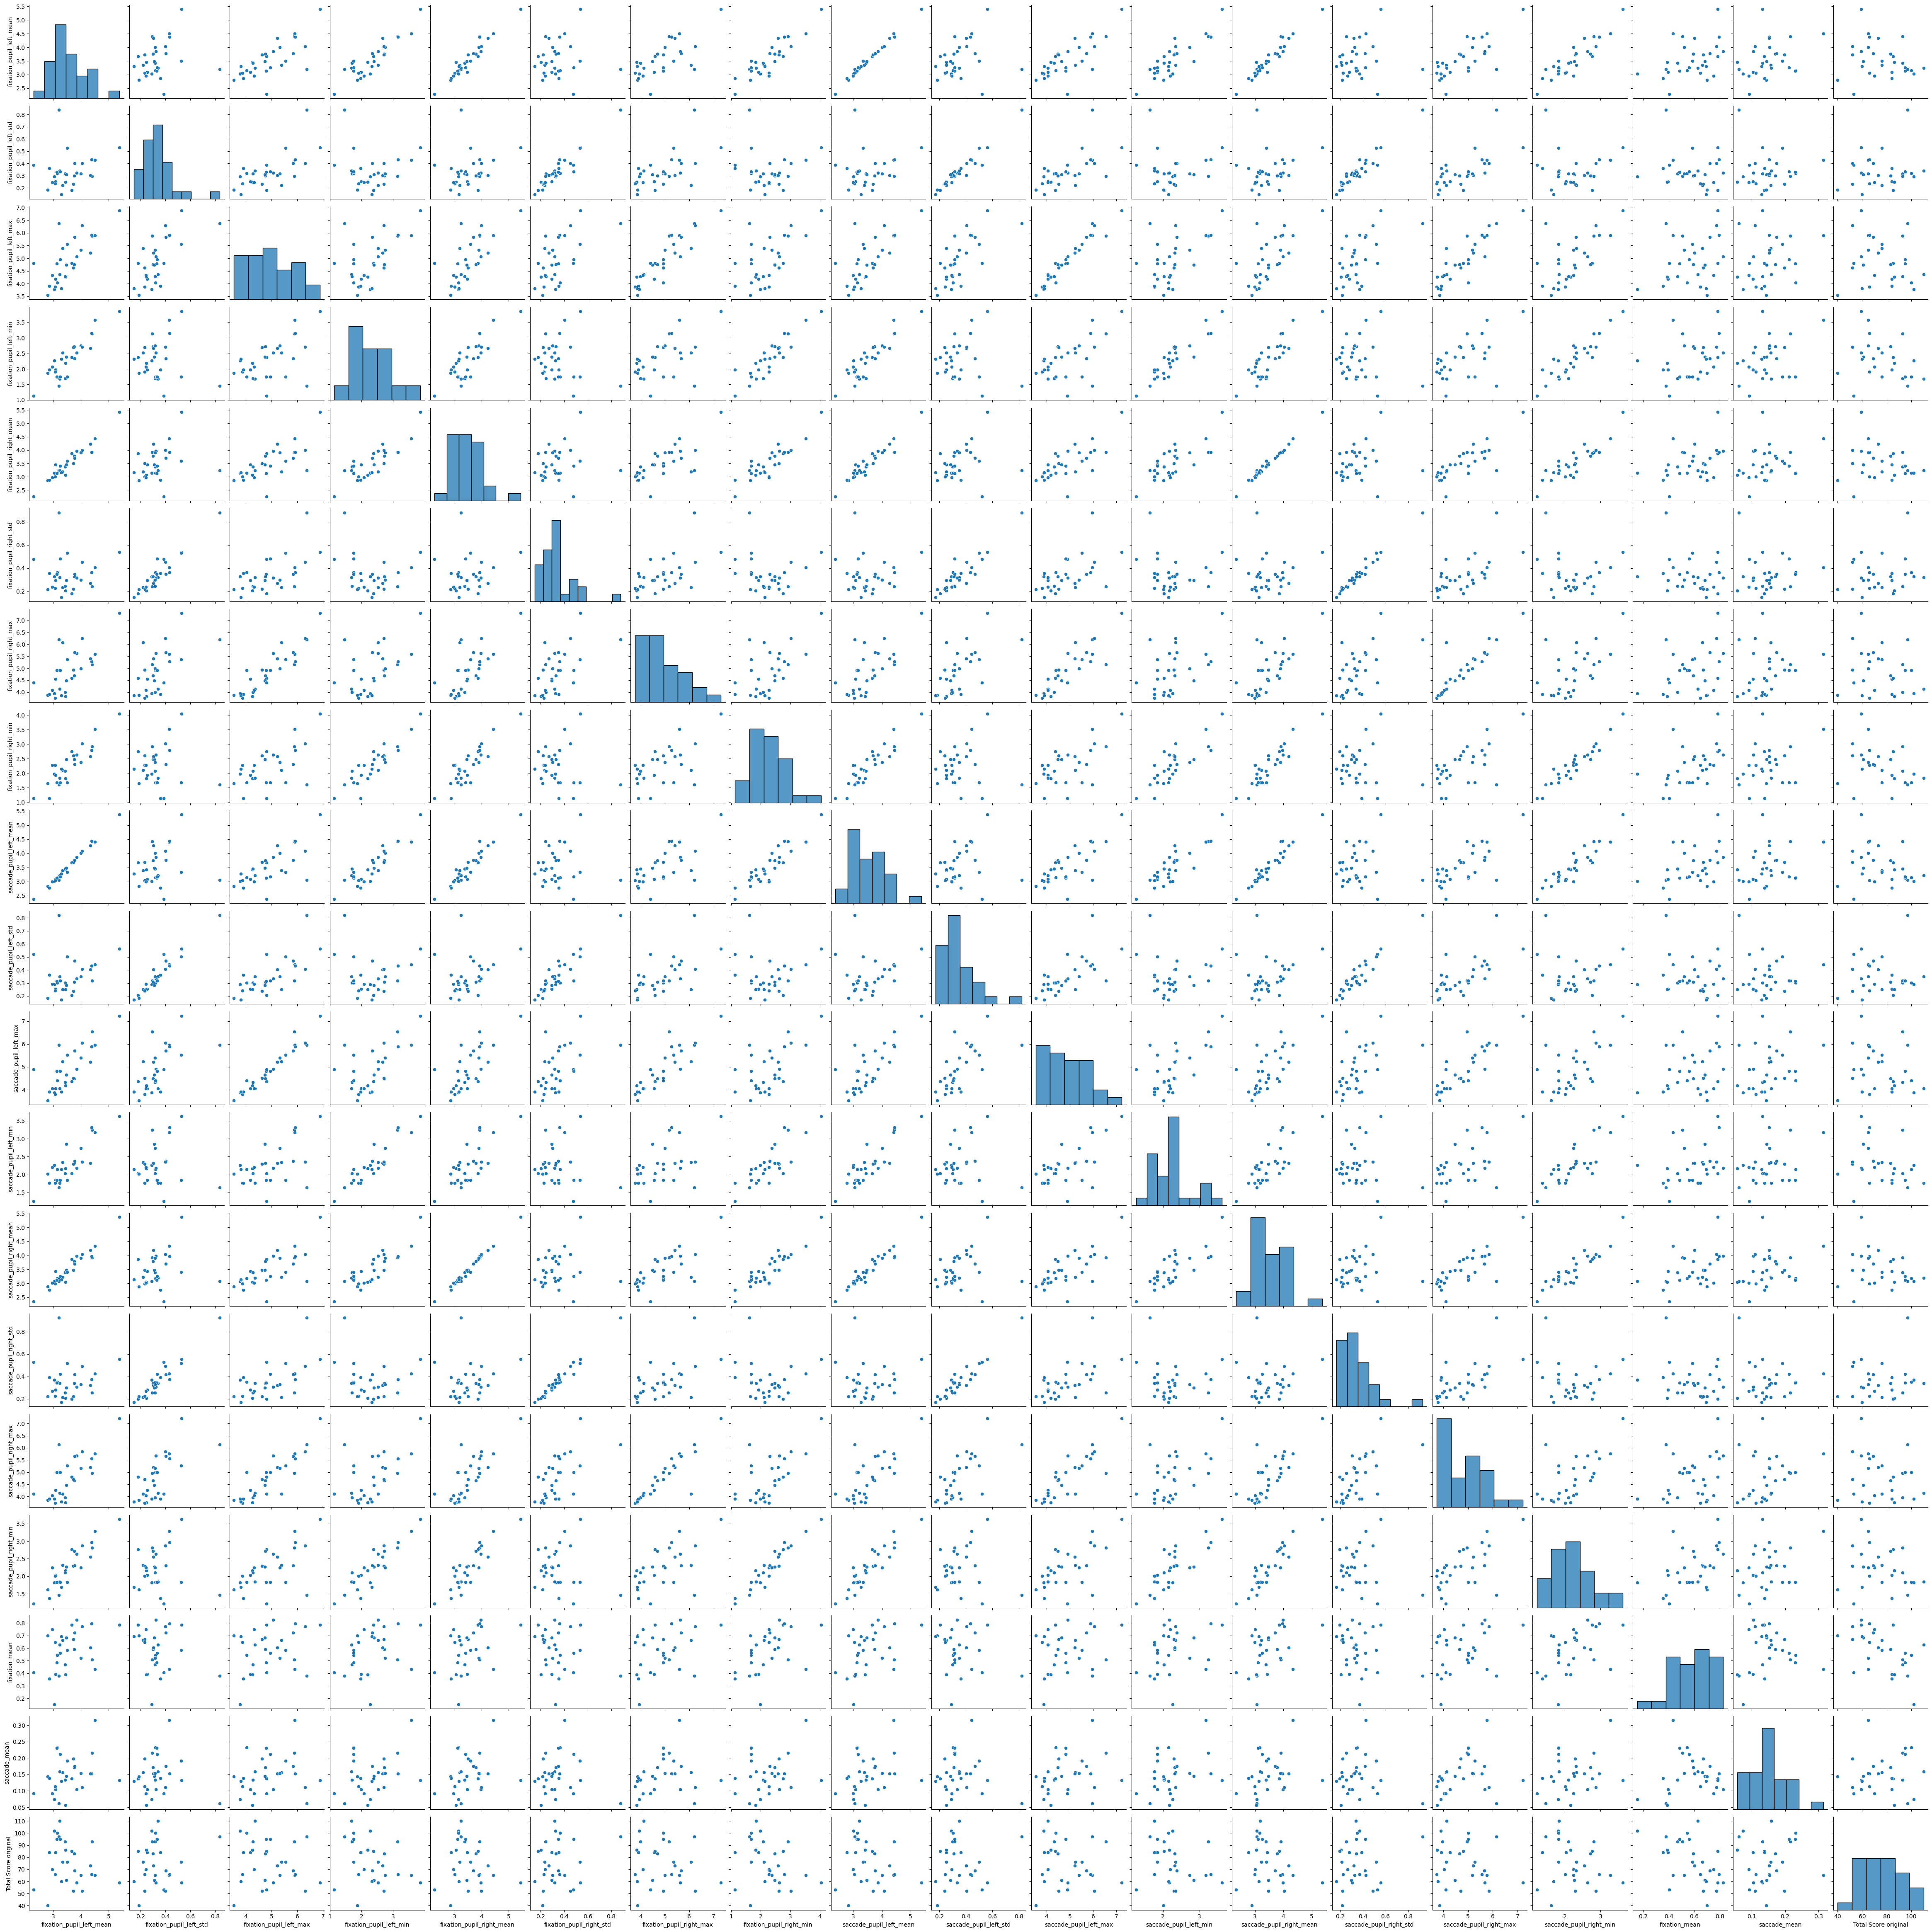

In [287]:
import seaborn as sns

# Create a pair plot
sns.pairplot(preprocessed_II.iloc[:, 1:])
plt.show()

### Read emapty score, change variable names to work with original and extended scores

In [310]:
# specify the file path

empathy_A = pd.read_csv(r"\dataset\19657323\Questionnaire_datasetIA.csv", encoding='latin1')
empathy_B = pd.read_csv(r"\dataset\19657323\Questionnaire_datasetIB.csv", encoding='latin1')

In [392]:
# specify the file path 
preprocessed_II = pd.read_csv(r"\empathy\preprocessed_data_II.csv")

# Merge the 'score' column from the second dataframe to the first dataframe based on participants' names
merged_df = preprocessed_II.merge(empathy_A[['Participant nr', 'Total Score original']], on='Participant nr', how='left')

# Update the 'score' column in the first dataframe with the values from the second dataframe
preprocessed_II['Total Score original'] = merged_df['Total Score original']

In [393]:
# specify the file path

preprocessed_III = pd.read_csv(r"\empathy\preprocessed_data_III_1.csv")

# Merge the 'score' column from the second dataframe to the first dataframe based on participants' names
merged_df = preprocessed_III.merge(empathy_B[['Participant nr', 'Total Score original']], on='Participant nr', how='left')

# Update the 'score' column in the first dataframe with the values from the second dataframe
preprocessed_III['Total Score original'] = merged_df['Total Score original']

## Plot empathy socre before and after for control group

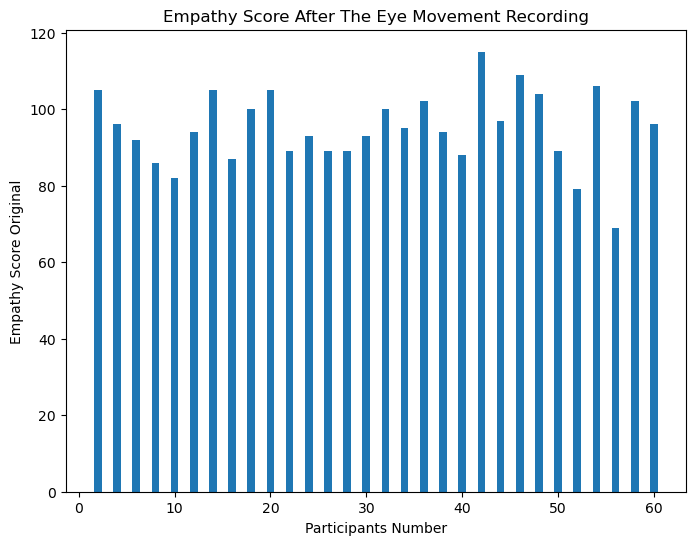

In [277]:
plt.figure(figsize=(8, 6))
plt.bar(preprocessed_II['Participant nr'], preprocessed_II['Total Score original'])
plt.xlabel('Participants Number')
plt.ylabel("Empathy Score Original")
plt.title('Empathy Score After The Eye Movement Recording')
plt.show()

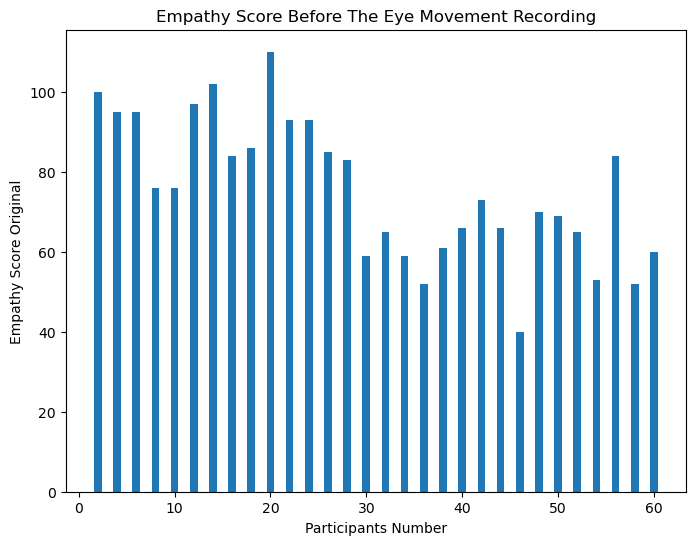

In [280]:
plt.figure(figsize=(8, 6))
plt.bar(preprocessed_II['Participant nr'], preprocessed_II['Total Score original'])
plt.xlabel('Participants Number')
plt.ylabel("Empathy Score Original")
plt.title('Empathy Score Before The Eye Movement Recording')
plt.show()

## Control Group Analysis

### Linear Regression

In [394]:
X = preprocessed_II.iloc[:, 1:-1]
y = preprocessed_II.iloc[:, -1]

In [395]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have x_train, x_test, y_train, and y_test as your train and test sets

In [396]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 101.43208342727125


In [397]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are your true and predicted target values
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.1539492577892111


In [398]:
y_test

27     96
15     94
23     79
17    115
8      89
9      89
Name: Total Score original, dtype: int64

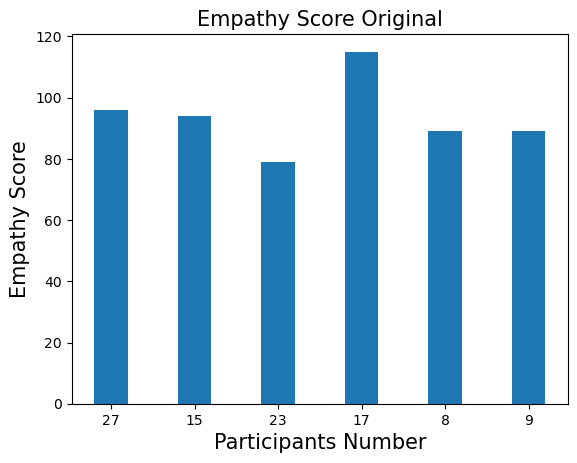

In [411]:
bar_width = 0.4

# Data for x-axis (Participants Number) and y-axis (Empathy Score Original)
participants = ["27", "15", "23", "17", "8", '9']
scores = y_test

# Create the bar plot with the specified bar width
plt.bar(participants, scores, width=bar_width)

plt.xlabel('Participants Number', fontsize = 15)
plt.ylabel("Empathy Score", fontsize = 15)
plt.title('Empathy Score Original', fontsize = 15)
plt.show()

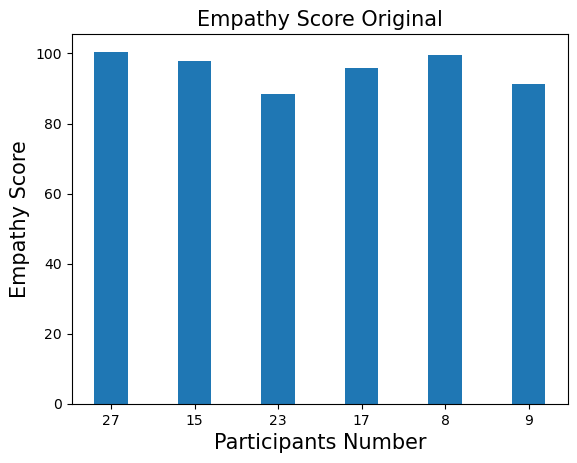

In [412]:
bar_width = 0.4

# Data for x-axis (Participants Number) and y-axis (Empathy Score Original)
participants = ["27", "15", "23", "17", "8", '9']
scores = y_pred

# Create the bar plot with the specified bar width
plt.bar(participants, scores, width=bar_width)

plt.xlabel('Participants Number', fontsize = 15)
plt.ylabel("Empathy Score", fontsize = 15)
plt.title('Empathy Score Original', fontsize = 15)
plt.show()

### Ridge Regression

In [384]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Create a Ridge Regression model with a specified alpha (regularization strength)
ridge_model = Ridge(alpha=5.0)  # You can adjust the alpha value as needed

# Fit the Ridge model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test datafrom sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have x_train, x_test, y_train, and y_test as your train and test setszzz
y_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (Ridge Regression):", mse)

Mean Squared Error (Ridge Regression): 269.58710308574973


In [385]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are your true and predicted target values
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.3934150338961939


## Test Group Analysis

### Linear regression

In [386]:
X = preprocessed_III.iloc[:, 1:-1]
y = preprocessed_III.iloc[:, -1]

In [387]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have x_train, x_test, y_train, and y_test as your train and test sets

In [388]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 955.2432139517737


In [389]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are your true and predicted target values
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -4.7689575075094535


### Redge regression

In [390]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Create a Ridge Regression model with a specified alpha (regularization strength)
ridge_model = Ridge(alpha=5.0)  # You can adjust the alpha value as needed

# Fit the Ridge model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test datafrom sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have x_train, x_test, y_train, and y_test as your train and test setszzz
y_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (Ridge Regression):", mse)

Mean Squared Error (Ridge Regression): 220.8076714414324


In [391]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are your true and predicted target values
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.33351386879576705


### Remove dimention with PCA to check if the results gets better or not

In [762]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Apply PCA with the desired number of components
num_components = 4  # You can change this based on your preference
pca = PCA(n_components=num_components)
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Now pca_data contains your data transformed by PCA

Explained Variance Ratio: [0.57027953 0.26420399 0.05423818 0.04575562]


In [772]:
X = pca_data
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have x_train, x_test, y_train, and y_test as your train and test sets

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 128.1899630279168


In [770]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are your true and predicted target values
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.06923972868512629
